## IMAGE PROCESSING FOR PNEUMONIA DETECTION

BY:
1. ARJUN KAPOOR (akapoor5, 50510484)

2. SAI TEJA ANKURU (saitejaa, 50496340)

## Libraries:

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing images:

In [10]:
normal_folder= "train/NORMAL"
pneumonia_folder = "train/PNEUMONIA"
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)
    return images

normal_images = load_images(normal_folder)
pneumonia_images = load_images(pneumonia_folder)

## Image processing:

In [11]:

num_images_to_display = 1
normal_images_random_index = normal_images[:5]
pneumonia_images_random_index = pneumonia_images[:5]

target_size = (224, 224)

#resize
normal_images_resize = [cv2.resize(img, target_size) for img in normal_images_random_index if img is not None]
pneumonia_images_resize = [cv2.resize(img, target_size) for img in pneumonia_images_random_index if img is not None]

#normalise
normal_images_normalise = [img/255 for img in normal_images_resize]
pneumonia_images_normalise = [img/255 for img in pneumonia_images_resize]

#bilateral filter
normal_images_smoothed = [cv2.bilateralFilter((img * 255).astype(np.uint8), d=2, sigmaColor=30, sigmaSpace=30) for img in normal_images_normalise]
pneumonia_images_smoothed = [cv2.bilateralFilter((img * 255).astype(np.uint8), d=2, sigmaColor=30, sigmaSpace=30) for img in pneumonia_images_normalise]

#histogram equalization
normal_images_equalized = [cv2.equalizeHist((img * 255).astype(np.uint8)) / 255 for img in normal_images_smoothed]
pneumonia_images_equalized = [cv2.equalizeHist((img * 255).astype(np.uint8)) / 255 for img in pneumonia_images_smoothed]

#Erosion
normal_images_eroded = [cv2.erode(img, kernel=np.ones((5, 5), np.uint8), iterations=1) for img in normal_images_equalized]
pneumonia_images_eroded = [cv2.erode(img, kernel=np.ones((5, 5), np.uint8), iterations=1) for img in pneumonia_images_equalized]

#Dilation
normal_images_dilated = [cv2.dilate(img, kernel=np.ones((5, 5), np.uint8), iterations=1) for img in normal_images_equalized]
pneumonia_images_dilated = [cv2.dilate(img, kernel=np.ones((5, 5), np.uint8), iterations=1) for img in pneumonia_images_equalized]

#Morphology
normal_images_opened = [cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel=np.ones((5, 5), np.uint8)) for img in normal_images_equalized]
pneumonia_images_opened = [cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel=np.ones((5, 5), np.uint8)) for img in pneumonia_images_equalized]

#canny edge detection
normal_images_edge_detection = [cv2.Canny((img * 255).astype(np.uint8), 50, 150) for img in normal_images_equalized]
pneumonia_images_edge_detection = [cv2.Canny((img * 255).astype(np.uint8), 50, 150) for img in pneumonia_images_equalized]

#sobel and scharr
normal_images_edges_sobel_x = [cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) for img in normal_images_equalized]
normal_images_edges_sobel_y = [cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) for img in normal_images_equalized]
normal_images_edges_sobel = [np.sqrt(np.square(x) + np.square(y)) for x, y in zip(normal_images_edges_sobel_x, normal_images_edges_sobel_y)]

pneumonia_images_edges_sobel_x = [cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) for img in pneumonia_images_equalized]
pneumonia_images_edges_sobel_y = [cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) for img in pneumonia_images_equalized]
pneumonia_images_edges_sobel = [np.sqrt(np.square(x) + np.square(y)) for x, y in zip(pneumonia_images_edges_sobel_x, pneumonia_images_edges_sobel_y)]

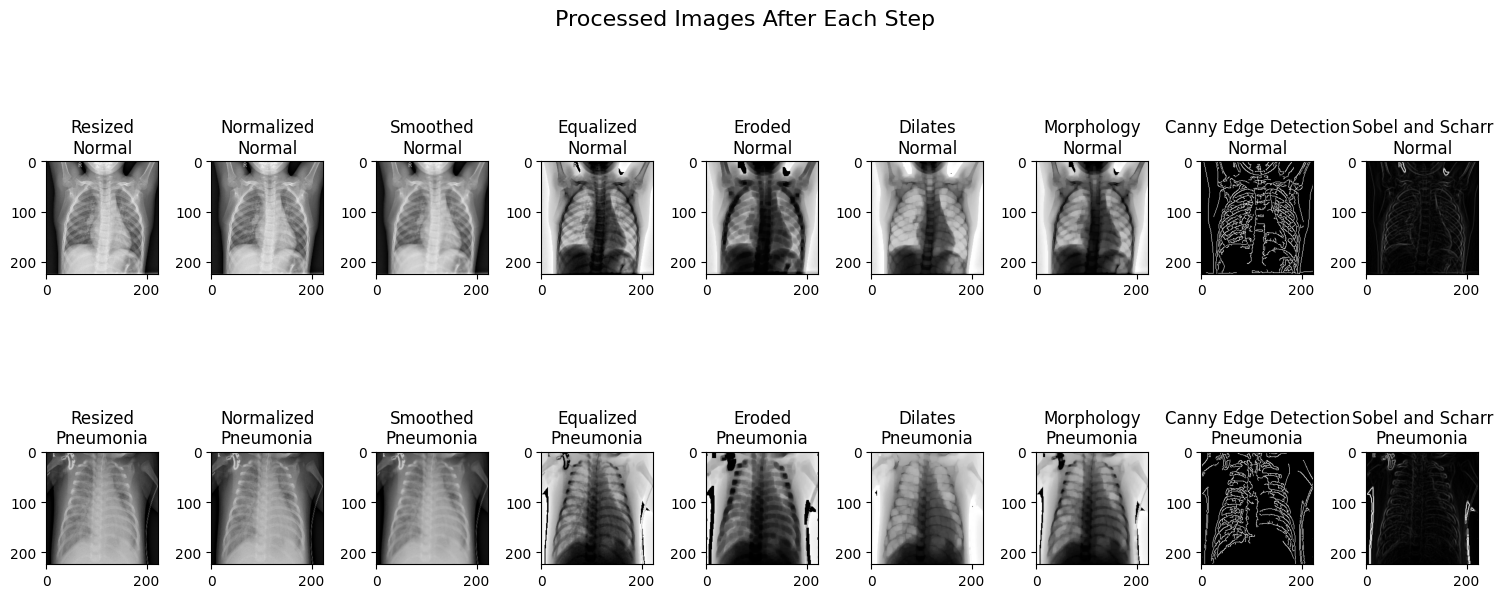

In [12]:
normal_images_list = [normal_images_resize, normal_images_normalise, normal_images_smoothed, normal_images_equalized, normal_images_eroded, normal_images_dilated, normal_images_opened, normal_images_edge_detection, normal_images_edges_sobel]
pneumonia_images_list = [pneumonia_images_resize, pneumonia_images_normalise, pneumonia_images_smoothed, pneumonia_images_equalized, pneumonia_images_eroded, pneumonia_images_dilated, pneumonia_images_opened, pneumonia_images_edge_detection, pneumonia_images_edges_sobel]

processing_labels = ['Resized', 'Normalized', 'Smoothed', 'Equalized', 'Eroded', 'Dilates', 'Morphology', 'Canny Edge Detection', 'Sobel and Scharr']

#num_images_to_display = 1

plt.figure(figsize=(15, 7))
plt.suptitle('Processed Images After Each Step', fontsize=16)

for i in range(len(processing_labels)):
    plt.subplot(2, len(processing_labels), i + 1)
    plt.imshow(normal_images_list[i][0], cmap='gray')
    plt.title(f'{processing_labels[i]}\nNormal')

    plt.subplot(2, len(processing_labels), len(processing_labels) + i + 1)
    plt.imshow(pneumonia_images_list[i][0], cmap='gray')
    plt.title(f'{processing_labels[i]}\nPneumonia')

plt.tight_layout()
plt.show()

It can be seen from the above visualization that smoothed image filter removes the detail from the image which is required to train the model. Canny Edge and sobel edge detection also remove the detail from the image required to detect Pneumonia. Whereas histogram equalization brings out contrast in the images. Therefore for model training only resizing, normalizing and histogram equalization will work.